# Tugas 2 Kecerdasan Artifisial

1. Memuat dataset (Spam SMS Collection) dan asumsikan kolom yang ada pada dalam CSV 

In [109]:
import pandas as pd

data = pd.read_csv("spam.csv", encoding="latin-1")
data = data[["v1", "v2"]]

2. Memproses data

In [110]:
X = data["v2"].values
y = data["v1"].map({"ham": 0, "spam": 1}).values # Konversi ke dalam bentuk numerik

3. Pisahkan dataset menjadi dataset training dan testing

In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Ubah setiap kata dalam teks menjadi bilangan bulat (token)

In [112]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

5. Membangun model jaringan saraf tiruan

In [113]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Embedding(max_words, 128, input_length=max_len))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

6. Compile model

In [114]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

7. Latih model

In [115]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = TensorBoard(log_dir='./logs')
epochs = 5
batch_size = 32
history = model.fit(X_train_pad, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[tensorboard_callback])

Epoch 1/5
112/112 [==============================] - 3s 22ms/step - loss: 0.1581 - accuracy: 0.9442 - val_loss: 0.0553 - val_accuracy: 0.9798
Epoch 2/5
112/112 [==============================] - 2s 21ms/step - loss: 0.0215 - accuracy: 0.9941 - val_loss: 0.0489 - val_accuracy: 0.9854
Epoch 3/5
112/112 [==============================] - 2s 21ms/step - loss: 0.0042 - accuracy: 0.9992 - val_loss: 0.0477 - val_accuracy: 0.9865
Epoch 4/5
112/112 [==============================] - 2s 21ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0487 - val_accuracy: 0.9854
Epoch 5/5
112/112 [==============================] - 2s 20ms/step - loss: 5.4305e-04 - accuracy: 1.0000 - val_loss: 0.0521 - val_accuracy: 0.9843


8. Catat performa model melalui grafik nilai loss dan nilai akurasi

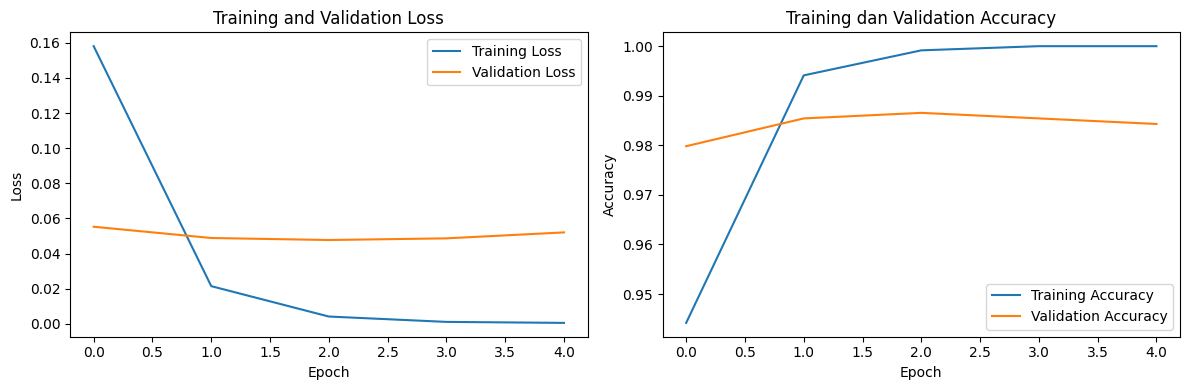

In [116]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training dan Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

9. Mengevaluasi model ke dalam set testing

In [117]:
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test accuracy: {test_accuracy}")

35/35 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.9821
Test accuracy: 0.9820627570152283


10. Tampilkan catatan model

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 128)          1280000   
                                                                 
 flatten_2 (Flatten)         (None, 12800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1638528   
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 2918657 (11.13 MB)
Trainable params: 2918657 (11.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


11. Simpan model dengan format file .h5

In [119]:
model.save("spam_sms_model.h5")

c:\Users\REPUBLIC OF GAMERS\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Berikut kode untuk menjalankan model

In [120]:
new_texts = ["Please call our customer service representative to get CASH", "Hello, how are you?", "Thanks for your subscription to my youtube channel, your mobile will be charged"]

# Tokenisasi dan pad sequence pada data teks baru
new_texts_seq = tokenizer.texts_to_sequences(new_texts)
new_texts_pad = pad_sequences(new_texts_seq, maxlen=max_len)

# Melakukan prediksi menggunakan model
predictions = model.predict(new_texts_pad)

# Menampilkan hasil prediksi
for i, prediction in enumerate(predictions):
    label = "spam" if prediction >= 0.5 else "ham"
    print(f"Text: {new_texts[i]} - Predicted Label: {label} - Probability: {prediction[0]}")

1/1 [==============================] - 0s 40ms/step
Text: Please call our customer service representative to get CASH - Predicted Label: spam - Probability: 0.8934561610221863
Text: Hello, how are you? - Predicted Label: ham - Probability: 6.39027712168172e-05
Text: Thanks for your subscription to my youtube channel, your mobile will be charged - Predicted Label: spam - Probability: 0.830620527267456
